In [1]:
import pandas as pd
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from scipy import stats

### Define os parâmetros de entrada para o Grupo 12

In [2]:
rep_cycle_hengelson = [7,2,7,7,7,2,2,5,6,5,6,5,6,1,6,4,3,4,3,4]
rep_cycle_tgs = [7,6,4,5,2,2,3,7,6,4,5,1,7,6,4,3,2,5,7,6]
rep_cycle_own = [7,6,4,5,7,2,6,5,4,7,2,6,3,4,1,5,7,2,6,3]

rep_cycle_full = 2*rep_cycle_hengelson

# Define o tempo de processamento de cada um dos produtos reais em cada estação
data = {0:[718, 723.5, 662.6, 701.7, 714.2, 748.3, 655.1],
        1:[591, 546.7, 540, 603.6, 522.7, 609.1, 580.3], 
        2:[741, 745.5, 699.7, 766.5, 753.3, 590.1, 714.8], 
        3:[769, 702.1, 644.6, 783.7, 756.3, 682.4, 730.2], 
        4:[748, 746.1, 709.5, 789.6, 648.1, 692.5, 730.9]}

dados = pd.DataFrame(data=data, index=[1,2,3,4,5,6,7])

In [3]:
dados

,0,1,2,3,4
1,718.0,591.0,741.0,769.0,748.0
2,723.5,546.7,745.5,702.1,746.1
3,662.6,540.0,699.7,644.6,709.5
4,701.7,603.6,766.5,783.7,789.6
5,714.2,522.7,753.3,756.3,648.1
6,748.3,609.1,590.1,682.4,692.5
7,655.1,580.3,714.8,730.2,730.9


In [4]:
dados.loc[6,3]

682.4

In [5]:
arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
df = pd.DataFrame(index=range(5), columns=index)

### Define a função que cálcula o Gannt para determinada sequência de produtos a serem produzidos

In [6]:
def gen_gannt(seq):
    
    rep_cycle_full = seq*2 # Calcula o Gannt para 2 repetições da sequência
    stations_list = range(5) # Define o número de estações
    
    # Cria o DataFrame com as linhas representando as estações e a colunas os produtos
    arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
    index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
    df = pd.DataFrame(index=range(5), columns=index)
    
    for station in stations_list:
        if station == 0:
            # Na primeira estação não é necessário verificar a existência de desbalanceamentos com a linha anterior 
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = 0 # Primeira estação inicia o trabalho no momento 0
                    df.loc[station, (i, 'Fim')] = dados.loc[j, station] # Tempo de início de fabricação produto + tempo de processamento
                else:
                    df.loc[0, (i, 'Inicio')] = df.loc[0, (i-1, 'Fim')] # Tempo de início do produto n será o mesmo que o tempo de fim do produto n-1
                    df.loc[0, (i, 'Fim')] = df.loc[0, (i, 'Inicio')] + dados.loc[j, station] # Adiciona o tempo de processamento ao tempo de início do produto
        else:
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = df.loc[station-1, (i, 'Fim')]
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]
                else:
                    # Só permite que o produto seja produziso na estação k se este já tiver sido produzido an estação k-1
                    df.loc[station, (i, 'Inicio')] = max([df.loc[station-1, (i, 'Fim')],df.loc[station, (i-1, 'Fim')]])
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]

    return df

### Gera 1000 sequências aleatórias considerando as demandas de cada produto
Créditos: Grupo10

In [7]:
tarefasOrder = []
possibleNumbers = []

for i in range (0,1000):  
    partial_list = []
    l1 = 1
    l2 = 3
    l3 = 2
    l4 = 3
    l5 = 3
    l6 = 4
    l7 = 4
    nextNumber = ''
    for j in range (0,20):
        possibleNumbers = []
        if l1>=1:
            possibleNumbers.append(1)
        if l2>=1:
            possibleNumbers.append(2)
        if l3>=1:
            possibleNumbers.append(3)
        if l4>=1:
            possibleNumbers.append(4)
        if l5>=1:
            possibleNumbers.append(5)
        if l6>=1:
            possibleNumbers.append(6)
        if l7>=1:
            possibleNumbers.append(7)

        nextNumber = random.choice(possibleNumbers)

        if(nextNumber==1):
            l1=l1-1
        if(nextNumber==2):
            l2=l2-1
        if(nextNumber==3):
            l3=l3-1
        if(nextNumber==4):
            l4=l4-1
        if(nextNumber==5):
            l5=l5-1
        if(nextNumber==6):
            l6=l6-1
        if(nextNumber==7):
            l7=l7-1
        partial_list.append(nextNumber)
    tarefasOrder.append(partial_list)

#     print(tarefasOrder)
#     tarefasOrder.clear()

In [8]:
dic = {}
for i,j in enumerate(tarefasOrder):
#     if i%10==0:    
#         print(i)
    dic[i] = (gen_gannt(j),j)

### Gannt gerado para uma das sequências aleatórias

In [9]:
dic[750][0]

Pos        0               1               2               3               4   \
state  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio   
0           0   701.7   701.7  1403.4  1403.4  2117.6  2117.6  2780.2  2780.2   
1       701.7  1305.3  1403.4    2007  2117.6  2640.3  2780.2  3320.2  3481.9   
2      1305.3  2071.8  2071.8  2838.3  2838.3  3591.6  3591.6  4291.3  4291.3   
3      2071.8  2855.5  2855.5  3639.2  3639.2  4395.5  4395.5  5040.1  5057.8   
4      2855.5  3645.1  3645.1  4434.7  4434.7  5082.8  5082.8  5792.3  5841.5   

Pos            ...       35                36                37           \
state     Fim  ...   Inicio      Fim   Inicio      Fim   Inicio      Fim   
0      3481.9  ...  24501.7  25156.8  25156.8  25905.1  25905.1  26653.4   
1      4085.5  ...  25156.8  25737.1  25905.1  26514.2  26653.4  27262.5   
2      5057.8  ...  26541.9  27256.7  27256.7  27846.8  27846.8  28436.9   
3      5841.5  ...  27551.1  28281.3  28281.3  28963.7  28963.7  29646.1   
4      6631.1  ...  28372.1    29103    29103  29795.5  29795.5    30488   

Pos         38                39           
state   Inicio      Fim   Inicio      Fim  
0      26653.4  27401.7  27401.7    28150  
1      27401.7  28010.8    28150  28759.1  
2      28436.9    29027    29027  29617.1  
3      29646.1  30328.5  30328.5  31010.9  
4        30488  31180.5  31180.5    31873  

[5 rows x 80 columns]

### Define a função para uma métrica e calcula-a para os itens a), b), d) e para as 1000 sequências aleatórias

Métrica: $\lambda = \frac{tempo\;total\;real}{tempo\;total\;ideal} - 1 = \frac{tempo\;total\;real}{40c}-1$

sendo:
    
    1. Tempo total real - Valor do fim no Gannt para o último produto produzido
    2. Tempo total ideal - Tempo necessário para produzir 40 unidades caso o tempo de ciclo da linha fosse seguido

In [10]:
def calc_metric(gannt):
    ideal_full_cycle = 722*40
    return (gannt.loc[4, (39, 'Fim')]/ideal_full_cycle)-1

hengelson_metric = calc_metric(gen_gannt(rep_cycle_hengelson))
tgs_metric = calc_metric(gen_gannt(rep_cycle_tgs))
own_metric = calc_metric(gen_gannt(rep_cycle_own))
work_metrics = [hengelson_metric, own_metric, tgs_metric]

metrics = []
for i in dic.keys():
    metrics.append(calc_metric(dic[i][0]))

full_metrics = metrics + work_metrics

full_sorted_metrics = sorted(full_metrics)#.sorted()

In [11]:
hengelson_index = full_sorted_metrics.index(hengelson_metric)
tgs_index = full_sorted_metrics.index(tgs_metric)
own_index = full_sorted_metrics.index(own_metric)

Text(0.5, 1.0, 'Métrica para os 1000 sequenciamentos aleatórios')

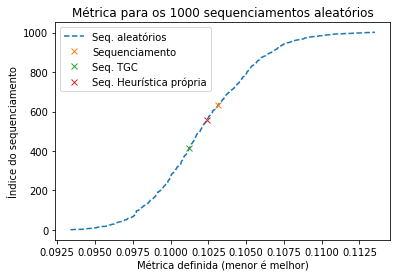

In [28]:
fig1, ax1 = plt.subplots()
ax1.plot(full_sorted_metrics,range(len(full_sorted_metrics)), '--', label='Seq. aleatórios')
ax1.plot(hengelson_metric,hengelson_index, 'x', label='Sequenciamento')
ax1.plot(tgs_metric,tgs_index, 'x', label='Seq. TGC')
ax1.plot(own_metric,own_index, 'x', label='Seq. Heurística própria')
ax1.legend()
plt.ylabel('Índice do sequenciamento')
plt.xlabel('Métrica definida (menor é melhor)')
plt.title('Métrica para os 1000 sequenciamentos aleatórios')

Text(0.5, 1.0, 'Distribuição de $\\lambda$ para as 1000 sequências')

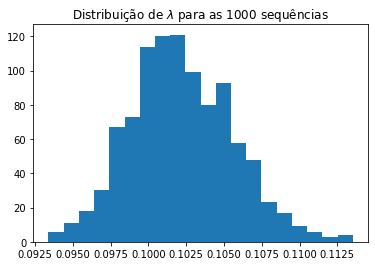

In [13]:
fig2, ax2 = plt.subplots()
ax2.hist(metrics, bins=20)#, density=True)#, cumulative=True)
plt.title('Distribuição de $\lambda$ para as 1000 sequências')

In [29]:
prob_hengelson = (len(full_sorted_metrics)-hengelson_index) / len(full_sorted_metrics)
print('P(Sequenciamento) = {:.2%}'.format(prob_hengelson))
prob_tgs = (len(full_sorted_metrics)-tgs_index) / len(full_sorted_metrics)
print('P(TGC) = {:.2%}'.format(prob_tgs))
prob_own = (len(full_sorted_metrics)-own_index) / len(full_sorted_metrics)
print('P(Própria) = {:.2%}'.format(prob_own))

P(Sequenciamento) = 36.99%
P(TGC) = 58.82%
P(Própria) = 44.27%


### Definir nova métrica
Para a estação gargalo, calcula-se o valor médio absoluto de variação em torno da média (dada pelo tempo de ciclo). Quanto menor este valor, melhor será o sequenciamento definido. 

In [15]:
# Cria o DataFrame com as linhas representando as estações e a colunas os produtos
arrays = [range(len(tarefasOrder)), ['Produto', 'Tempo', 'Desvio']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
newmetric_df = pd.DataFrame(index=range(20), columns=index)

newmetric_df.loc[:,pd.IndexSlice[:, 'Produto']]=np.array(tarefasOrder).transpose()
newmetric_df.head()

e4 = dados[3]

for i in range(1000):
    newmetric_df.loc[:, pd.IndexSlice[i, 'Tempo']]=np.array(e4.loc[newmetric_df[i]['Produto']])

for i in range(1000):
    newmetric_df.loc[:, pd.IndexSlice[i,'Desvio']] = newmetric_df.loc[:, pd.IndexSlice[i,'Tempo']] - pd.Series([722]*20)

In [16]:
desvios_df = newmetric_df.loc[:, pd.IndexSlice[:,['Desvio', 'Acumulado']]]
desvios_df.head()

Pos,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
state,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,...,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio
0,8.2,8.2,61.7,-77.4,-77.4,61.7,8.2,-19.9,-77.4,61.7,...,-77.4,8.2,61.7,61.7,61.7,-39.6,-19.9,-39.6,-19.9,34.3
1,8.2,-39.6,-19.9,-39.6,-39.6,34.3,47.0,34.3,-77.4,-19.9,...,47.0,47.0,-19.9,-39.6,34.3,-77.4,47.0,-19.9,-77.4,-39.6
2,34.3,47.0,34.3,-19.9,-19.9,-39.6,-19.9,47.0,8.2,-39.6,...,-77.4,34.3,8.2,-39.6,61.7,-19.9,-19.9,-77.4,-39.6,-77.4
3,47.0,8.2,-19.9,34.3,-39.6,47.0,61.7,8.2,-19.9,-39.6,...,34.3,-19.9,47.0,34.3,-39.6,8.2,-77.4,34.3,-19.9,-19.9
4,-77.4,-77.4,-19.9,8.2,61.7,61.7,-77.4,-77.4,-19.9,-39.6,...,-39.6,34.3,34.3,34.3,-39.6,-39.6,61.7,61.7,34.3,8.2


In [17]:
acumulado = desvios_df.cumsum()
acumulado.head()

Pos,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
state,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,...,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio
0,8.2,8.2,61.7,-77.4,-77.4,61.7,8.2,-19.9,-77.4,61.7,...,-77.4,8.2,61.7,61.7,61.7,-39.6,-19.9,-39.6,-19.9,34.3
1,16.4,-31.4,41.8,-117.0,-117.0,96.0,55.2,14.4,-154.8,41.8,...,-30.4,55.2,41.8,22.1,96.0,-117.0,27.1,-59.5,-97.3,-5.3
2,50.7,15.6,76.1,-136.9,-136.9,56.4,35.3,61.4,-146.6,2.2,...,-107.8,89.5,50.0,-17.5,157.7,-136.9,7.2,-136.9,-136.9,-82.7
3,97.7,23.8,56.2,-102.6,-176.5,103.4,97.0,69.6,-166.5,-37.4,...,-73.5,69.6,97.0,16.8,118.1,-128.7,-70.2,-102.6,-156.8,-102.6
4,20.3,-53.6,36.3,-94.4,-114.8,165.1,19.6,-7.8,-186.4,-77.0,...,-113.1,103.9,131.3,51.1,78.5,-168.3,-8.5,-40.9,-122.5,-94.4


In [24]:
# Cálculos feitos no excel
abs_mean_hengelson = 9.11 
abs_mean_tgs = 17.75
abs_mean_own = 59.10

random_seq = np.array(acumulado.mean(axis=0).abs())
full_random_seq = np.append(random_seq, (abs_mean_hengelson, abs_mean_own, abs_mean_tgs))
full_random_seq_sorted = np.sort(full_random_seq)

hengelson_abs_index = full_random_seq_sorted.tolist().index(abs_mean_hengelson)  
tgs_abs_index = full_random_seq_sorted.tolist().index(abs_mean_tgs) 
own_abs_index = full_random_seq_sorted.tolist().index(abs_mean_own) 

Text(0.5, 1.0, 'Média absoluta dos desvios em relação à média')

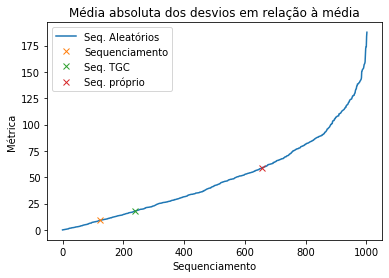

In [25]:
fig3, ax3 = plt.subplots()
ax3.plot(range(len(full_random_seq_sorted)), full_random_seq_sorted, label = 'Seq. Aleatórios')
ax3.plot(hengelson_abs_index, abs_mean_hengelson, 'x', label = 'Sequenciamento')
ax3.plot(tgs_abs_index, abs_mean_tgs, 'x', label = 'Seq. TGC')
ax3.plot(own_abs_index, abs_mean_own, 'x', label = 'Seq. próprio')
plt.legend()
plt.xlabel('Sequenciamento')
plt.ylabel('Métrica')
plt.title('Média absoluta dos desvios em relação à média')

Text(0.5, 1.0, 'Histograma')

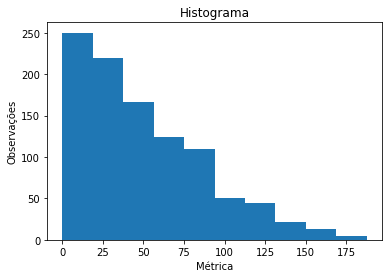

In [26]:
fig4, ax4 = plt.subplots()
ax4.hist(full_random_seq)
plt.xlabel('Métrica')
plt.ylabel('Observações')
plt.title('Histograma')

In [27]:
prob_hengelson2 = (len(full_random_seq_sorted)-hengelson_abs_index) / len(full_random_seq_sorted)
print('P(Sequenciamento) = {:.2%}'.format(prob_hengelson2))
prob_tgs2 = (len(full_random_seq_sorted)-tgs_abs_index) / len(full_random_seq_sorted)
print('P(TGC) = {:.2%}'.format(prob_tgs2))
prob_own2 = (len(full_random_seq_sorted)-own_abs_index) / len(full_random_seq_sorted)
print('P(Própria) = {:.2%}'.format(prob_own2))

P(Sequenciamento) = 87.74%
P(TGC) = 76.37%
P(Própria) = 34.40%
